In [ ]:
!pip install opencv-python
!pip install mediapipe
!pip install streamlit

In [2]:
import mediapipe as mp 
import time
import cv2 
import csv
import os
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Testing Mediapipe

In [3]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR - RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False       
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Process
        results = holistic.process(image)
        
        image_height, image_width, _ = image.shape
        
        # RGB - BGRX
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
       
        # Hand Detection
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        
        cv2.imshow('Testing Mediapipe', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
landmarks = ['class']
for val in range(1, 42 + 1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
    
with open('dataset.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [5]:
import cv2
import mediapipe as mp
import csv
import numpy as np

# Inisialisasi objek detektor holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

# Fungsi untuk menangkap gambar dan menyimpannya ke dalam file CSV
def capture_and_save(class_name, data):
    with mp_holistic.Holistic(min_detection_confidence=0.3,min_tracking_confidence=0.3) as holistic:
        while data <= 100:
            ret, frame = cap.read()
            # BGR 2 RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Flip on horizontal
            image = cv2.flip(image, 1)
            # Set flag
            image.flags.writeable = False
            # Detections
            results = holistic.process(image)
            # Set flag to true
            image.flags.writeable = True
            # RGB 2 BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
            
            lh = list(np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3))
            rh = list(np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3))

            row = lh + rh
            # Tambahkan nama kelas
            row.insert(0, class_name)

            # Export to CSV
            with open('dataset.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 

            cv2.imshow('Ambil Gambar', image)

            if cv2.waitKey(10) & 0xFF == ord('x'):
                break
            
            data += 1
            print(f'Variabel kelas {class_name}: Pengambilan gambar {data}/100')

# Main loop
class_names = ["A", "B", "C"]
data = 0
for class_name in class_names:
    print(f"Langkah untuk menangkap gambar untuk kelas {class_name}:")
    input("Tekan Enter untuk melanjutkan...")
    capture_and_save(class_name, data)

cap.release()
cv2.destroyAllWindows()


Langkah untuk menangkap gambar untuk kelas A:


Tekan Enter untuk melanjutkan... 


Variabel kelas A: Pengambilan gambar 1/100
Variabel kelas A: Pengambilan gambar 2/100
Variabel kelas A: Pengambilan gambar 3/100
Variabel kelas A: Pengambilan gambar 4/100
Variabel kelas A: Pengambilan gambar 5/100
Variabel kelas A: Pengambilan gambar 6/100
Variabel kelas A: Pengambilan gambar 7/100
Variabel kelas A: Pengambilan gambar 8/100
Variabel kelas A: Pengambilan gambar 9/100
Variabel kelas A: Pengambilan gambar 10/100
Variabel kelas A: Pengambilan gambar 11/100
Variabel kelas A: Pengambilan gambar 12/100
Variabel kelas A: Pengambilan gambar 13/100
Variabel kelas A: Pengambilan gambar 14/100
Variabel kelas A: Pengambilan gambar 15/100
Variabel kelas A: Pengambilan gambar 16/100
Variabel kelas A: Pengambilan gambar 17/100
Variabel kelas A: Pengambilan gambar 18/100
Variabel kelas A: Pengambilan gambar 19/100
Variabel kelas A: Pengambilan gambar 20/100
Variabel kelas A: Pengambilan gambar 21/100
Variabel kelas A: Pengambilan gambar 22/100
Variabel kelas A: Pengambilan gambar 23/1

Tekan Enter untuk melanjutkan... 


Variabel kelas B: Pengambilan gambar 1/100
Variabel kelas B: Pengambilan gambar 2/100
Variabel kelas B: Pengambilan gambar 3/100
Variabel kelas B: Pengambilan gambar 4/100
Variabel kelas B: Pengambilan gambar 5/100
Variabel kelas B: Pengambilan gambar 6/100
Variabel kelas B: Pengambilan gambar 7/100
Variabel kelas B: Pengambilan gambar 8/100
Variabel kelas B: Pengambilan gambar 9/100
Variabel kelas B: Pengambilan gambar 10/100
Variabel kelas B: Pengambilan gambar 11/100
Variabel kelas B: Pengambilan gambar 12/100
Variabel kelas B: Pengambilan gambar 13/100
Variabel kelas B: Pengambilan gambar 14/100
Variabel kelas B: Pengambilan gambar 15/100
Variabel kelas B: Pengambilan gambar 16/100
Variabel kelas B: Pengambilan gambar 17/100
Variabel kelas B: Pengambilan gambar 18/100
Variabel kelas B: Pengambilan gambar 19/100
Variabel kelas B: Pengambilan gambar 20/100
Variabel kelas B: Pengambilan gambar 21/100
Variabel kelas B: Pengambilan gambar 22/100
Variabel kelas B: Pengambilan gambar 23/1

Tekan Enter untuk melanjutkan... 


Variabel kelas C: Pengambilan gambar 1/100
Variabel kelas C: Pengambilan gambar 2/100
Variabel kelas C: Pengambilan gambar 3/100
Variabel kelas C: Pengambilan gambar 4/100
Variabel kelas C: Pengambilan gambar 5/100
Variabel kelas C: Pengambilan gambar 6/100
Variabel kelas C: Pengambilan gambar 7/100
Variabel kelas C: Pengambilan gambar 8/100
Variabel kelas C: Pengambilan gambar 9/100
Variabel kelas C: Pengambilan gambar 10/100
Variabel kelas C: Pengambilan gambar 11/100
Variabel kelas C: Pengambilan gambar 12/100
Variabel kelas C: Pengambilan gambar 13/100
Variabel kelas C: Pengambilan gambar 14/100
Variabel kelas C: Pengambilan gambar 15/100
Variabel kelas C: Pengambilan gambar 16/100
Variabel kelas C: Pengambilan gambar 17/100
Variabel kelas C: Pengambilan gambar 18/100
Variabel kelas C: Pengambilan gambar 19/100
Variabel kelas C: Pengambilan gambar 20/100
Variabel kelas C: Pengambilan gambar 21/100
Variabel kelas C: Pengambilan gambar 22/100
Variabel kelas C: Pengambilan gambar 23/1

# Data Training from CSV

In [6]:
df = pd.read_csv('dataset.csv')

In [7]:
col = df.groupby('class')['class'].count()
print (col)
df.shape

class
A    101
B    101
C    101
Name: class, dtype: int64


(303, 127)

In [8]:
df.head(5)

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z39,x40,y40,z40,x41,y41,z41,x42,y42,z42
0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = df.drop('class', axis=1).values # features akan menjadi semua nilai koord
y = df['class'] # target = label kelas

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
#Mengimport Model yang pembuat gunakan yaitu RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, accuracy_score


#Memanggil Fungsi Model
RFC = RandomForestClassifier()
#fitting Model terhadap data training
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
#Akurasi dari Data training
print(accuracy_score(y_test,y_pred)) #mencetak akurasi prediksi
print(classification_report(y_test,y_pred)) #mencetak classification report Precision, Recall, F1

0.945054945054945
              precision    recall  f1-score   support

           A       0.86      0.96      0.91        25
           B       1.00      0.87      0.93        31
           C       0.97      1.00      0.99        35

    accuracy                           0.95        91
   macro avg       0.94      0.94      0.94        91
weighted avg       0.95      0.95      0.95        91



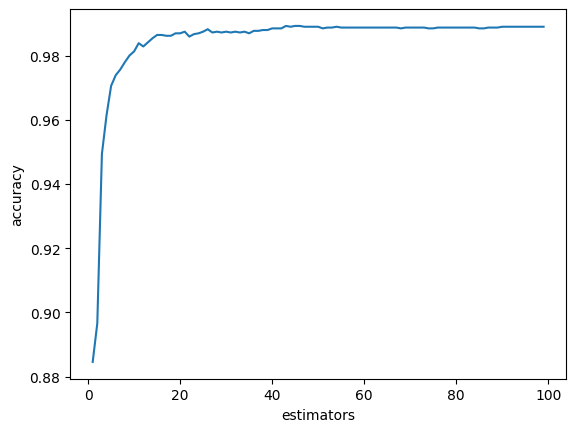

In [11]:
import matplotlib.pyplot as plt

score_rf = []
for each in range(1,100):
    model = RandomForestClassifier(n_estimators = each,random_state = 1)
    model.fit(X_train,y_train)
    score_rf.append(model.score(X_test,y_test))
    
plt.plot(range(1,100),score_rf)
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.show()

C:\Users\papamamah\AppData\Local\Temp\ipykernel_9600\389220802.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(RFC['Actual'], color = 'r', label = 'Actual Price', hist = False)


ValueError: could not convert string to float: 'N'

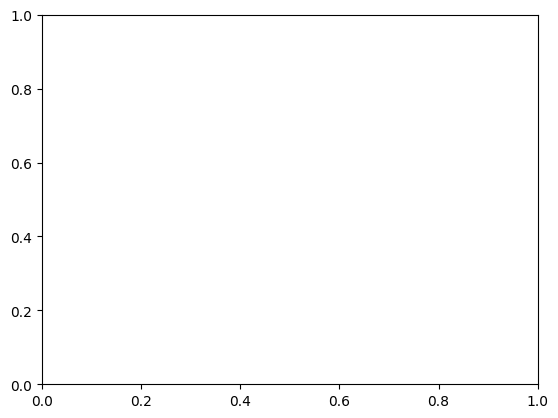

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

RFC = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

ax = sns.distplot(RFC['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(RFC['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

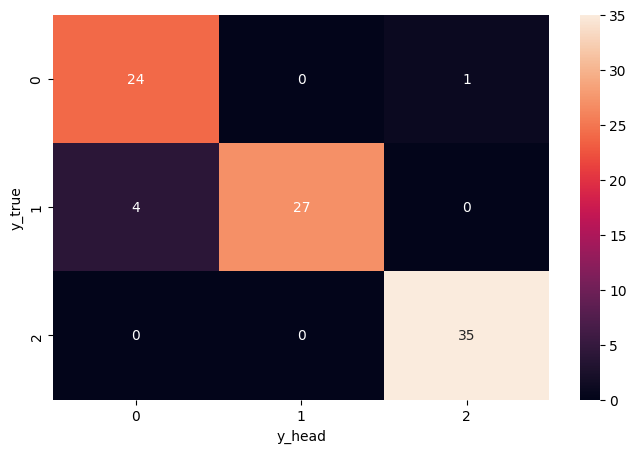

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
#Mengimport Model yang pembuat gunakan yaitu RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, accuracy_score


#Memanggil Fungsi Model
RFC = RandomForestClassifier()
#fitting Model terhadap data training
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
#Akurasi dari Data training
print(accuracy_score(y_test,y_pred)) #mencetak akurasi prediksi
print(classification_report(y_test,y_pred)) #mencetak classification report Precision, Recall, F1

0.9590163934426229
              precision    recall  f1-score   support

           A       0.89      1.00      0.94        41
           B       1.00      0.88      0.94        43
           C       1.00      1.00      1.00        38

    accuracy                           0.96       122
   macro avg       0.96      0.96      0.96       122
weighted avg       0.96      0.96      0.96       122



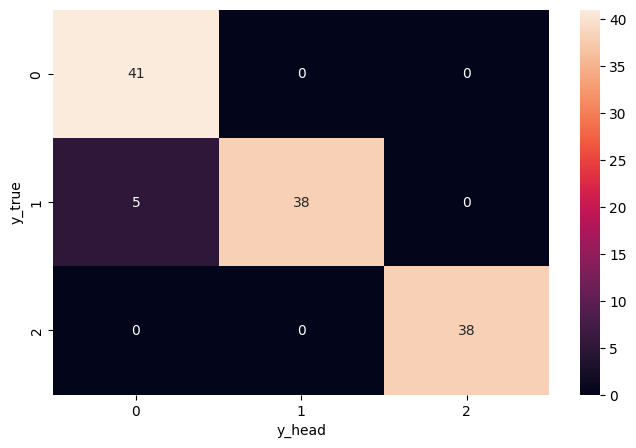

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [25]:
joblib.dump(RFC, "RFC_model.sav")

['RFC_model.sav']

# Testing

In [15]:
RFC = joblib.load("RFC_model.sav")

In [26]:
cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        curr_time = time.time()
        
        ret, frame = cap.read()

        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Flip on horizontal
        image = cv2.flip(image, 1)

        # Set flag
        image.flags.writeable = False

        # Detections
        results = holistic.process(image)
        
        # get image shape
        image_height, image_width, _ = image.shape

        # Set flag to true
        image.flags.writeable = True

        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        if results.right_hand_landmarks or results.left_hand_landmarks:
            # Mengambil Pose landmarks
            lh = list(np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3))
            rh = list(np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3))

            # Satukan baris
            row = lh+rh

            # Tambah class name 
            X = pd.DataFrame([row])
            hand_class = RFC.predict(X)[0]
            
            cv2.rectangle(image, (0,0), (120, 40), (245, 117, 16), -1)
            cv2.putText(image, 'CLASS',(10,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, hand_class.split(' ')[0], (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
        
        cv2.imshow('Testing Model', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

cap.release()
cv2.destroyAllWindows()